## Calcular el Factorial de un número

Crear una función en R que calcule el factorial de un número. Se puede hacer recursivo o iterativo.

In [30]:
miFactorial<-function(X){
    f<-c(1:X)
    factorial<-prod(f)
    factorial
}

In [35]:
miFactorial(1)

[1] 1

## Percentiles

Hacer una función que calcule el percentil de un vector. Recibirá dos parámetros, el vector y el percentil que queremos ver, sino se indica el percentil se supondrá que es el 50%.

In [7]:
vector<-c(1,3,5,7,985,45,12,1)

percentile = function(x, per=50){
    x = sort(x)
    pXX = round((per/100) * length(x))
    return(x[pXX])
}

calcPercentile<-function(x,p=50){
    p<-p/100
    x<-sort(na.omit(x))
    idx<- 1+(length(x)-1)*p
    err<-ceiling(idx)-idx
    xl <- x[floor(idx)]
    xh <- x[ceiling(idx)]
    xl*err+xh*(1-err)
}
percentile (vector,70)
calcPercentile(vector,70)
quantile(vector,0.7)

[1] 12

[1] 11.5

70% 
11.5

 ## CSV edad española
 
 Usando el CSV del INE.¿Cual es la media de edad de la población española? ¿y la mediana? ¿la moda?

\\[ 
    \bar{x} =  \frac{1}{\text{poblaciónTotal}} \sum _{i=1}^N edad_i · poblaciónConEdad_i 
\\]

In [9]:
poblacion<-read.csv("data/9663c.csv",skip=6,
                    fileEncoding="ISO-8859-1",header=F)
poblacion$V5<-NULL
colnames(poblacion)<-c("edadTxt","Total","Hombres","Mujeres")
poblacion<-poblacion[1:105,]
poblacion$edad<-0:104

In [10]:
poblacion <- poblacion[1:105,]
#poblacion$edad <- 0:104
poblacion$edad <- as.integer(sub("año(|s)","",poblacion$edadTxt))
tail(poblacion)

,edadTxt,Total,Hombres,Mujeres,edad
,<fct>,<dbl>,<dbl>,<dbl>,<int>
100,99 años,7894,1773,6121,99
101,100 años,5381,1204,4177,100
102,101 años,3266,675,2591,101
103,102 años,1762,285,1477,102
104,103 años,1103,169,935,103
105,104 años,638,97,542,104


In [65]:
mediaPoblacionEspañola<-sum(poblacion$Total*poblacion$edad)/sum(poblacion$Total)
mediaPoblacionEspañola

[1] 42.58639

In [11]:
indice<-sum(poblacion$Total)/2
acumulado<-0
i<-1
while (acumulado<indice){
    acumulado<-acumulado+poblacion$Total[i]
    i<-i+1
}
medianaPoblacionEspañola<-poblacion$edad[i-1]
medianaPoblacionEspañola

[1] 43

In [84]:
modaPoblacionEspañola<-poblacion$edad[which.max(poblacion$Total)]
modaPoblacionEspañola

[1] 41

## Peso al nacer

Leer el dataset que se encuentra en tests/birthweight_reduced.csv. 
Quedarse con la columna Birthweight.
Calcular cuantiles, media, desigualdad Chebyshev para k=2, y compararla con los cuartiles. Boxplot.
Pinta su histograma y función de densidad.

In [14]:
bwt<-read.csv("data/birthweight_reduced.csv")
weight<-bwt$Birthweight*0.453592

In [15]:
k<-sqrt(2)
1/k^2
lim_inf<-mean(weight)-k*sd(weight)
lim_sup<-mean(weight)+k*sd(weight)

[1] 0.5

In [16]:
quantile(weight, c(0.25,0.75))

25%      75% 
2.925668 3.628736

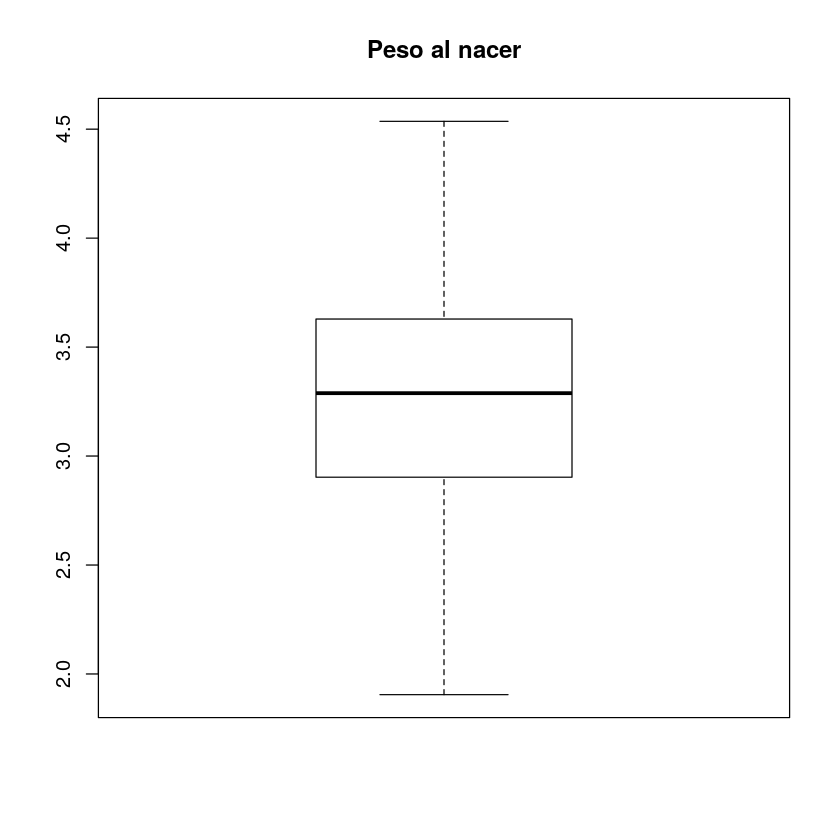

In [17]:
boxplot(weight, main="Peso al nacer")